# Installation Guide

### Install Package

Install CCDPApy package into google colab

In [ ]:
"""
Installation code for private respository
"""
# Mount drive
'''from google.colab import drive
drive.mount('/content/drive')

import os

# Path to CCDPApy
_ccdpapy_dir = '/content/drive/MyDrive/Yudai Fukae/short_course/CCDPApy'
# _ccdpapy_dir = '/content/drive/MyDrive/Work/Undergrad Research/Yudai Fukae/short_course/CCDPApy' #for YAL

os.chdir(_ccdpapy_dir)
print(os.getcwd())'''

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/10GYngaDghETx7l2BFNQmGSz2xBvRZAuS/Yudai Fukae/short_course/CCDPApy


In [ ]:
"""
Installation code for public respository
"""
# # Mount drive
# from google.colab import drive
# drive.mount('/content/drive')

# import os
# # Create folders for CCDPApy Tutorial
# _ccdpapy_tutorial_dir = '/content/drive/MyDrive/CCDPApy_Tutorial'
# if os.path.exists(_ccdpapy_tutorial_dir) == False:
#   os.mkdir(_ccdpapy_tutorial_dir)
# os.chdir(_ccdpapy_tutorial_dir)

# # clone git respository
# ! git clone https://github.com/lu000285/CCDPApy.git

# # cd into package folder
# _ccdpapy_dir = '/content/drive/MyDrive/CCDPApy_Tutorial/CCDPApy'
# os.chdir(_ccdpapy_dir)
# print(os.getcwd())

'\nInstallation code for public respository\n'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Overview Of Data Processing

## Diagrams

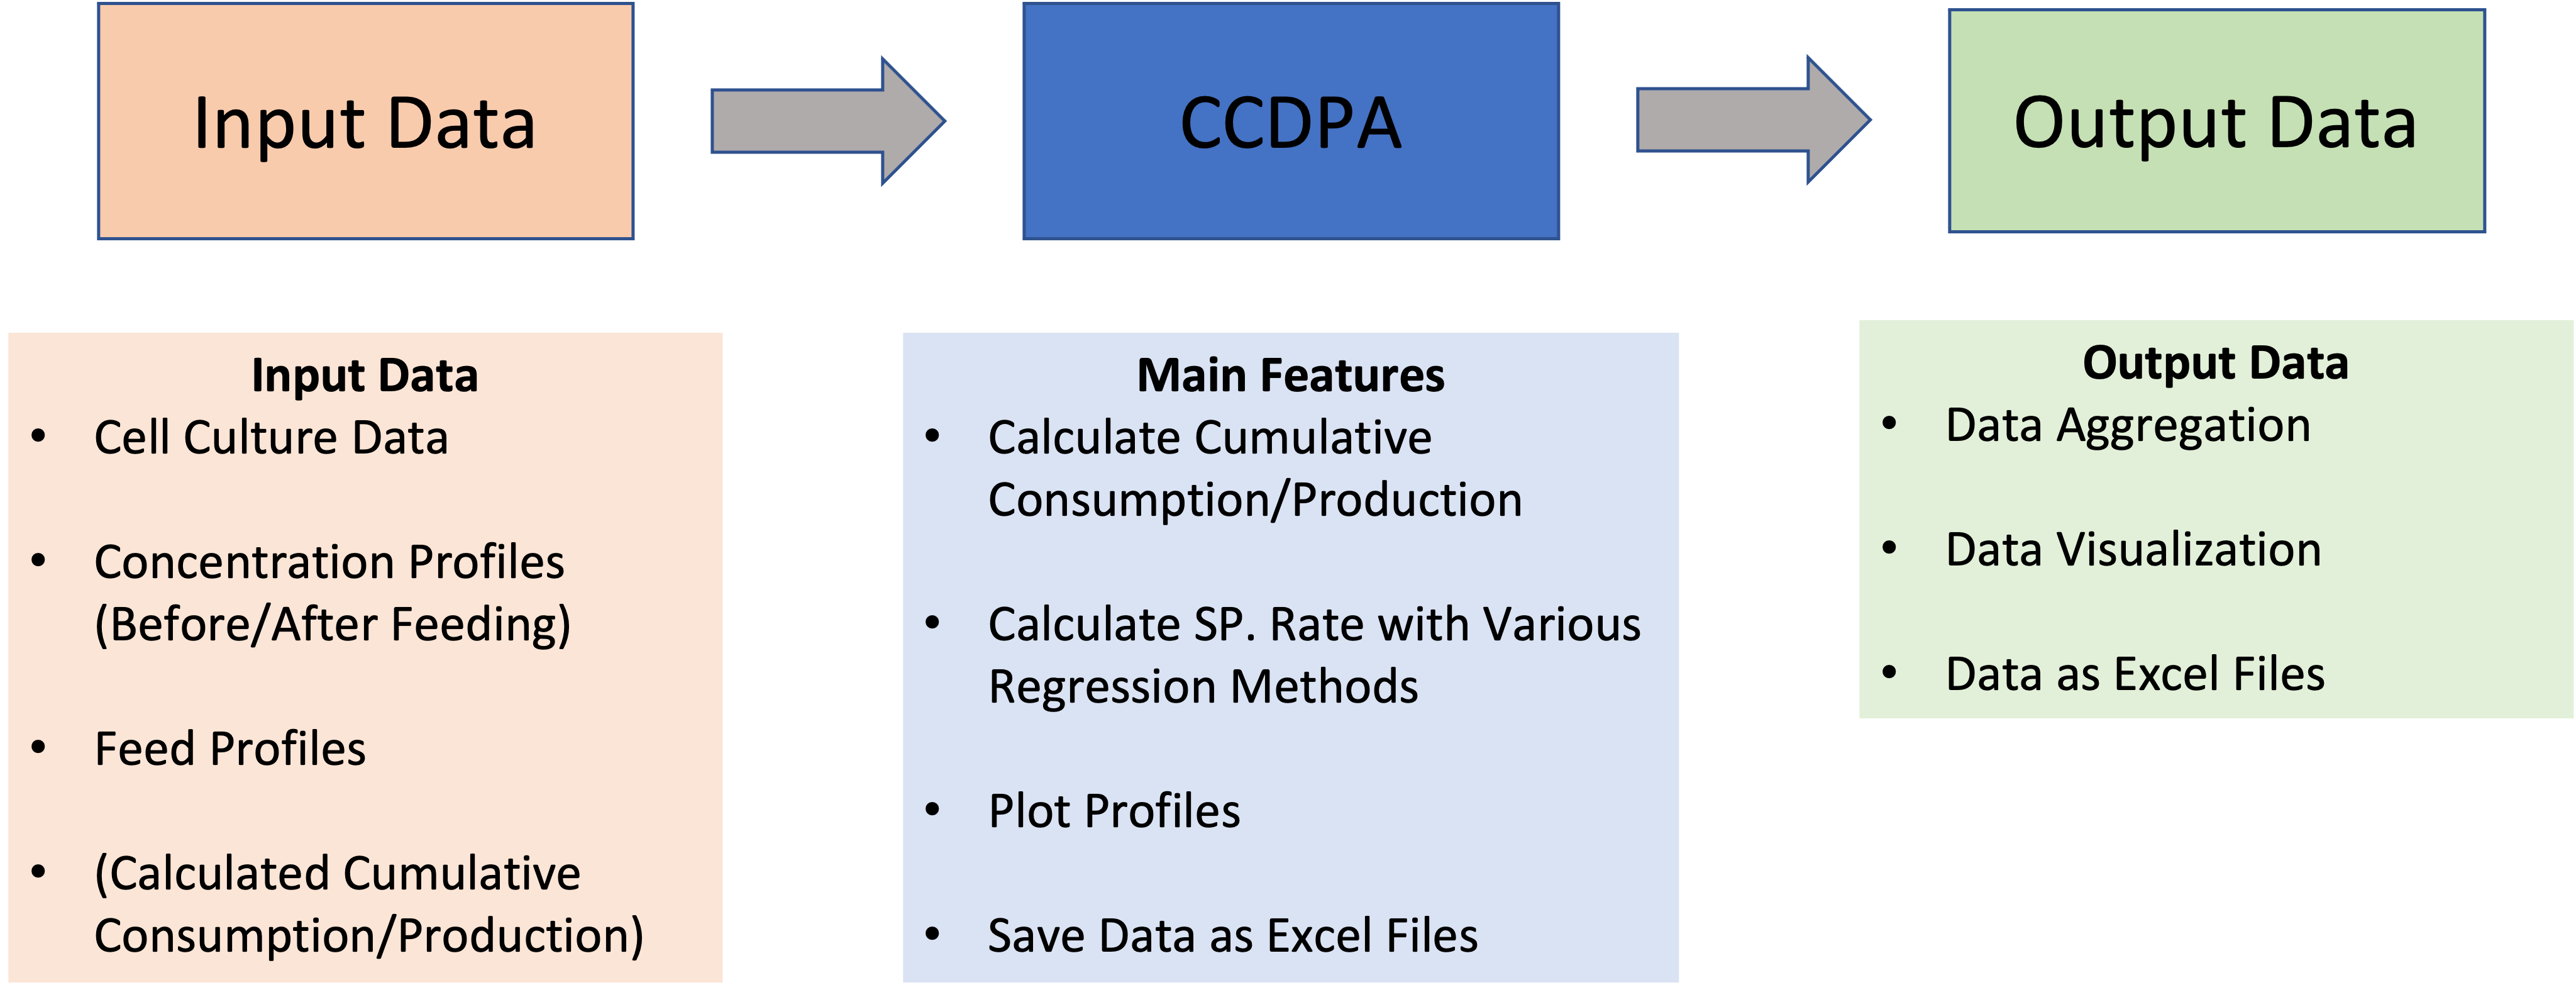

## Template of Input Data File

### Fed-batch Cell Culture

[Fed-batch Cell Culture Data File](https://docs.google.com/spreadsheets/d/13oPBo0V65-G7ccktdw38_5-ijU-1N9iz/edit#gid=352742570)

### Perfusion Cell Culture

[Perfusion Cell Culture Data File](https://docs.google.com/spreadsheets/d/15ZFD6rFTvAVllCXsXbTGfrIm0tOEIq9-/edit#gid=874200718)

# Cell Culture Parameter module

### ___FedBatchParameters()___ Class for Fed-batch Cell Culture

Parameters
----------
    cell_line_name : str
        Cell line name
    use_feed_concentration : bool
        True if feed concentration is used for the calculation of cumulative concentraion.
    use_concentration_after_feed : bool
        True if concentration after feeding is used for the calculation of cumulative concentraion.
    regression_method : list of str, default=[], optional
        Regression method. Choose 'polynomial', 'rolling_window_polynomial'.
    rolling_polynomial_degree : int, default=3, optional
        polynomial degree for rolling window regression.
    rolling_polynomial_window : int, default=6, optional
        window size for rolling window regression.

In [ ]:
from CCDPApy import FedBatchParameters

param = FedBatchParameters(cell_line_name='TEST',
                           use_feed_concentration=True,
                           use_concentration_after_feed=False,
                           regression_method='polynomial')

### ___PerfusionParameters()___ Class for Perfusion Cell Culture

Parameters
----------
    cell_line_name : str
        Cell line name
    recycling_factor : float, default=0.25, optional
        recycling factor for perfusion cell culture.
    concentration_factor : float, default=3.0, optional
        concentration factor for perfusion cell culture.
    regression_method : list of str, default=[], optional
        Regression method. Choose 'polynomial'.

In [ ]:
from CCDPApy import PerfusionParameters

param = PerfusionParameters(cell_line_name='TEST',
                            recycling_factor=0.2,
                            concentration_factor=3,
                            regression_method='polynomial')

# Cell Culture Pipeline Module for Data Processing

## ___cell_culture_pipeline()___
<br>
Perform in-processing; calculation of cumulative profile and sp. rate profile using two-point calculation.
<br>
Perform post-processing; using regression method specified by parameter class for the calculation of cumulative profile and sp. rate profile.

Parameters
----------
    cell_culture_type : str
        type of cell culture. choose 'fed-batch' or 'perfusion'.
    fiel : str
        data file to analyze.
    parameters : parameter class or list of parameter class.
        FedBatchParameters or PerfusionParameters

# Case Studies; Three Industrial Cell Lines for Fed-batch Cell Culture

## Parameter Setting

### For Cell Line 1

Cell Line 1 has __3 differnet experiments__.<br>
Cell Line 1 has __feed concentrations__ but no measurements of __concentrations after feeding__.
__Glutamine__ feed is added in Cell Line 1.

In [ ]:
from CCDPApy import FedBatchParameters

param_1 = FedBatchParameters(cell_line_name='CL1',
                             use_concentration_after_feed=False,
                             use_feed_concentration=True,
                             regression_method=['polynomial', 'rolling_window_polynomial'],
                             rolling_polynomial_degree=3,
                             rolling_polynomial_window=6)
param_1

Cell Line: CL1
Feed concentration will be used: True
Concentration after feeding will be used: False
Regression Methods
     Polynomial: True
     Rolling window polynomial True

### For Cell Line 2

Cell Line 2 has __3 experiments__.<br>
Cell Line 2 has measurements of __concentrations after feeding__ but does't have __feed concentraions__.<br>
__Glucose__ feed is added in Cell Line 2.

In [ ]:
from CCDPApy import FedBatchParameters

param_2 = FedBatchParameters(cell_line_name='CL2',
                             use_concentration_after_feed=True,
                             use_feed_concentration=False,
                             regression_method=['polynomial', 'rolling_window_polynomial'],
                             rolling_polynomial_degree=3,
                             rolling_polynomial_window=6)
param_2

Cell Line: CL2
Feed concentration will be used: False
Concentration after feeding will be used: True
Regression Methods
     Polynomial: True
     Rolling window polynomial True

### For Cell Line 3

Cell Line 3 has __3 experiments__.<br>
Cell Line 3 doesn't have both measurements of __concentrations after feeding__ and __feed concentraions__.<br>
For __glucose__, Cell Line 3 has the __calculated cumulative profile__ in Measured Data.<br>
__Glutamine__ feed is added in Cell Line 3.

In [ ]:
from CCDPApy import FedBatchParameters

param_3 = FedBatchParameters(cell_line_name='CL3',
                             use_concentration_after_feed=False,
                             use_feed_concentration=False,
                             regression_method=['polynomial', 'rolling_window_polynomial'],
                             rolling_polynomial_degree=3,
                             rolling_polynomial_window=6)
param_3

Cell Line: CL3
Feed concentration will be used: False
Concentration after feeding will be used: False
Regression Methods
     Polynomial: True
     Rolling window polynomial True

## Data Processing

In [ ]:
from CCDPApy import cell_culture_pipeline

file = 'fed_batch_data.xlsx'
fed_batch = cell_culture_pipeline(cell_culture_type='fed-batch',
                                  file=file,
                                  parameters=[param_1, param_2, param_3])

/content/drive/.shortcut-targets-by-id/10GYngaDghETx7l2BFNQmGSz2xBvRZAuS/Yudai Fukae/short_course/CCDPApy/CCDPApy/helper/helper.py:36: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(df.iloc[0, indices[i-1]:indices[i]], axis=1, inplace=True)
/content/drive/.shortcut-targets-by-id/10GYngaDghETx7l2BFNQmGSz2xBvRZAuS/Yudai Fukae/short_course/CCDPApy/CCDPApy/helper/helper.py:36: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(df.iloc[0, indices[i-1]:indices[i]], axis=1, inplace=True)
/content/drive/.shortcut-targets-by-id/10GYngaDghETx7l2BFNQmGSz2xBvRZAuS/Yudai Fukae/short_course/CCDPApy/CCDPApy/helper/helper.py:36: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(

# Interactive Plot Method

In [ ]:
fed_batch.interactive_plot()

/usr/local/lib/python3.10/dist-packages/dash/dash.py:516: UserWarning: JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Export Processed Data as an Excel

### ___save_excel()____ method

Parameters
----------
file_name : str
    File name.
    Please include '.xlsx'.

In [ ]:
fed_batch.save_excel(file_name='fed_batch_output.xlsx')

fed_batch_output.xlsx  saved.


### Output File

[output file](https://docs.google.com/spreadsheets/d/1-2xM6SVVoQrEfJnPX1SgYTk1E7wEc8aM/edit#gid=1455544529)

# Case Studies; Perfusion Cell Culture

## Parameter Setting

In [ ]:
from CCDPApy import PerfusionParameters

param = PerfusionParameters(cell_line_name='CL20',
                            recycling_factor=0.25,
                            concentration_factor=3,
                            regression_method=['polynomial'])
param

Cell Line: CL20
Recycling factor: 0.25
Concentration factor: 3
Regression Methods
     Polynomial: True

## Data Processing

In [ ]:
file = 'perfusion_data.xlsx'
perfusion = cell_culture_pipeline(cell_culture_type='perfusion',
                                  file=file,
                                  parameters=param)

/content/drive/.shortcut-targets-by-id/10GYngaDghETx7l2BFNQmGSz2xBvRZAuS/Yudai Fukae/short_course/CCDPApy/CCDPApy/helper/helper.py:36: FutureWarning:

DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead

/content/drive/.shortcut-targets-by-id/10GYngaDghETx7l2BFNQmGSz2xBvRZAuS/Yudai Fukae/short_course/CCDPApy/CCDPApy/helper/helper.py:36: FutureWarning:

DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead



## Save Processed Data

In [ ]:
perfusion.save_excel(file_name='perfusion_output.xlsx')

perfusion_output.xlsx  saved.


### Output File

[output file](https://docs.google.com/spreadsheets/d/15ijJU-X85GyCVPjkOS-qR0IujDC-cyX_/edit#gid=456601249)